In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
df = pd.read_csv('influence_data.csv')
df

influencer_id  influencer_name influencer_main_genre  \
0             759491    The Exploited              Pop/Rock   
1              25462           Tricky            Electronic   
2              66915        Bob Dylan              Pop/Rock   
3              71209    Leonard Cohen              Pop/Rock   
4              91438     The Gun Club              Pop/Rock   
...              ...              ...                   ...   
42765         580300   Sufjan Stevens              Pop/Rock   
42766         261309      Vybz Kartel                Reggae   
42767         467203  Michael Jackson                  R&B;   
42768        2518003          Popcaan                Reggae   
42769        2896351        Tommy Lee                Reggae   

       influencer_active_start  follower_id      follower_name  \
0                         1980           74     Special Duties   
1                         1990          335          PJ Harvey   
2                         1960          335          PJ Harvey   
3                         1950          335          PJ Harvey   
4                         1980          335          PJ Harvey   
...                        ...          ...                ...   
42765                     1990      3661738  Rosemary & Garlic   
42766                     2000      3670556   Trinidad Cardona   
42767                     1960      3670556   Trinidad Cardona   
42768                     2000      3670556   Trinidad Cardona   
42769                     2000      3670556   Trinidad Cardona   

      follower_main_genre  follower_active_start  
0                Pop/Rock                   1980  
1                Pop/Rock                   1990  
2                Pop/Rock                   1990  
3                Pop/Rock                   1990  
4                Pop/Rock                   1990  
...                   ...                    ...  
42765            Pop/Rock                   2010  
42766                R&B;                   2010  
42767                R&B;                   2010  
42768                R&B;                   2010  
42769                R&B;                   2010  

[42770 rows x 8 columns]

In [3]:
#calculation time influence
df['gap_inf'] = df['follower_active_start'] - df['influencer_active_start']
df['gap_inf'] = (df['gap_inf'] - df['gap_inf'].min())/(df['gap_inf'].max()- df['gap_inf'].min())
df

influencer_id  influencer_name influencer_main_genre  \
0             759491    The Exploited              Pop/Rock   
1              25462           Tricky            Electronic   
2              66915        Bob Dylan              Pop/Rock   
3              71209    Leonard Cohen              Pop/Rock   
4              91438     The Gun Club              Pop/Rock   
...              ...              ...                   ...   
42765         580300   Sufjan Stevens              Pop/Rock   
42766         261309      Vybz Kartel                Reggae   
42767         467203  Michael Jackson                  R&B;   
42768        2518003          Popcaan                Reggae   
42769        2896351        Tommy Lee                Reggae   

       influencer_active_start  follower_id      follower_name  \
0                         1980           74     Special Duties   
1                         1990          335          PJ Harvey   
2                         1960          335          PJ Harvey   
3                         1950          335          PJ Harvey   
4                         1980          335          PJ Harvey   
...                        ...          ...                ...   
42765                     1990      3661738  Rosemary & Garlic   
42766                     2000      3670556   Trinidad Cardona   
42767                     1960      3670556   Trinidad Cardona   
42768                     2000      3670556   Trinidad Cardona   
42769                     2000      3670556   Trinidad Cardona   

      follower_main_genre  follower_active_start   gap_inf  
0                Pop/Rock                   1980  0.428571  
1                Pop/Rock                   1990  0.428571  
2                Pop/Rock                   1990  0.642857  
3                Pop/Rock                   1990  0.714286  
4                Pop/Rock                   1990  0.500000  
...                   ...                    ...       ...  
42765            Pop/Rock                   2010  0.571429  
42766                R&B;                   2010  0.500000  
42767                R&B;                   2010  0.785714  
42768                R&B;                   2010  0.500000  
42769                R&B;                   2010  0.500000  

[42770 rows x 9 columns]

In [4]:
#calculate genre influence
grouped = df["follower_name"].groupby(by=[df["follower_main_genre"],df["influencer_main_genre"]]).count()  #series
comindex = list(grouped.index)

In [5]:
temp_list = df['follower_main_genre'].tolist()
genre_list = list(set([i for i in temp_list]))
genre_df = pd.DataFrame(np.zeros((20,20)),columns = genre_list)
genre_df['index'] = genre_list
genre_df = genre_df.set_index('index',drop=True)

In [6]:
for i in comindex:
    genre_df.loc[i[0],i[1]] = grouped[i[0]][i[1]]
#genre_df.to_csv('genre.csv',header=1,index=1)   #index denote old genre, colunms denote following genre
for i in range(20):
    genre_df.iloc[i] = (genre_df.iloc[i] - genre_df.iloc[i].min())/(genre_df.iloc[i].max()- genre_df.iloc[i].min())
#genre_df.to_csv('genre2.csv',header=1,index=1) 


In [7]:
df['genre_inf'] = ''
for i in genre_list:
    for j in genre_list:
        df.loc[(df['follower_main_genre'] == i) & (df['influencer_main_genre'] == j),'genre_inf'] = genre_df.loc[i,j]

In [70]:
#calculate overall influence
df['weight'] = (df['genre_inf'] + df['gap_inf'])/2
df1 = df.loc[:, ['influencer_name', 'follower_name','weight']]
df.to_csv('df.csv')

In [69]:
time = df["influencer_name"].groupby(by=[df["influencer_main_genre"],df["influencer_active_start"]]).nunique()
time['Pop/Rock']

influencer_active_start
1930      1
1940      2
1950     99
1960    371
1970    363
1980    463
1990    370
2000    110
2010     10
Name: influencer_name, dtype: int64

In [9]:
weighted_edges = []
for i in range(df1.shape[0]):
    weighted_edges.append(tuple(df1.iloc[i]))
#weighted_edges = np.array(df1)
#weighted_edges = weighted_edges.tolist()
out_genre = np.array(df.loc[:,'influencer_main_genre'])
out_genre = out_genre.tolist()

In [10]:
time = df["weight"].groupby(by=[df["influencer_main_genre"],df["influencer_active_start"]]).sum() #series
index = list(time.index)
index = np.array(index)
index = pd.DataFrame(index)
time = time.tolist()
time = pd.DataFrame(np.array(time))
time = pd.concat([index,time], axis=1)
time.columns = ['genre','year','influence']
time.to_csv('weight by year.csv')

In [11]:
#influencer
df2 = df.iloc[:,0:4]
df2.columns=['id','name','genre','time']
df2 = df2.drop_duplicates('id',keep='first')
#influencer_list =  list(set([i for i in df2['influencer_id']]))

In [12]:
#follower
df3 = df.iloc[:,4:8]
df3.columns=['id','name','genre','time']
df3 = df3.drop_duplicates('id',keep='first')
#follower_list =  list(set([i for i in df3['follower_id']]))
df4 = df3['name'].groupby(by=df3['genre']).count()

In [13]:
nodes = df2.merge(df3, on=['id', 'name', 'genre', 'time'], how='outer')
for i in range(len(genre_list)):
    nodes.loc[(nodes['genre'] == genre_list[i]), 'genre_label'] = i * 3
nodes['time_label'] = nodes['time'] - nodes['time'].min()
nodes = np.array(nodes)
nodes = nodes.tolist()

In [14]:
# create a network
network = nx.MultiDiGraph()

In [15]:
# set node,edge
for node in nodes:
    network.add_node(node[1], id=node[0], genre=node[2], time=node[3],
                        genre_label=node[4], time_label=node[5])

In [16]:
network.add_weighted_edges_from(weighted_edges, weight='weight')

In [17]:
network['Ben Webster']['Sonny Rollins'][0]['weight']

0.75

In [18]:
# check the density（ratio between the number of nodes and the number of edges） of our network)
nx.density(network)

0.0013798084566482701

In [19]:
# calculater out degree denoting the influence of one influencer
out_degree = network.out_degree()
list = []
for i in network.nodes():
    list.append(out_degree[i])

max_out_degree = max(list)

In [20]:
for node in network.nodes():
    network.nodes[node]['coordinates'] = (network.nodes[node]['time_label'],network.nodes[node]['genre_label'])

In [21]:
#set colors for artists from different genre
color_list = ['firebrick','tomato','chocolate','tan','orange','gold','yellow','yellowgreen','lightgreen', 'darkgreen',
              'lime','turquoise','teal','cyan','deepskyblue','steelblue','royalblue','blue','darkviolet','magenta']

for i in network.nodes():
    for j in range(len(color_list)):
        if network.nodes[i]['genre'].find(genre_list[j]) == 0 :
            network.nodes[i]['color'] = color_list[j]
          
    if out_degree[i] >= max_out_degree * .9:
        network.nodes[i]['importance'] = 1500
    elif out_degree[i] >= max_out_degree * .5:
        network.nodes[i]['importance'] = 1000
    else:
        network.nodes[i]['importance'] = 500


In [22]:
#full network
elarge = [(u, v) for (u, v, d) in network.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in network.edges(data=True) if d["weight"] <= 0.5]

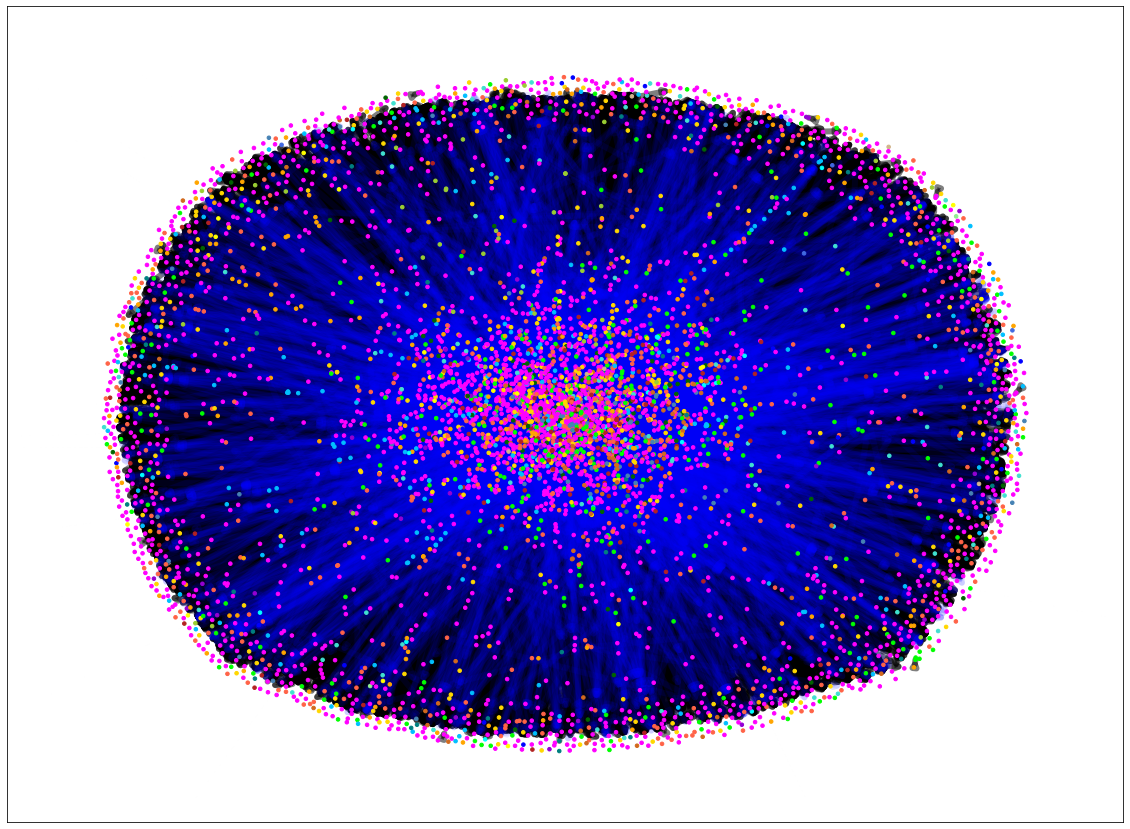

In [98]:
pos = nx.spring_layout(network)  # positions for all nodes
plt.figure(figsize = (20, 15))
#node
nx.draw_networkx_nodes(network,pos, node_shape = '.', 
                       node_size = [importance for importance in nx.get_node_attributes(network, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network, 'color').values()])
# edges
nx.draw_networkx_edges(network, pos, edgelist=elarge, width=6,alpha = 0.5)
nx.draw_networkx_edges(network, pos, edgelist=esmall, width=6, alpha=0.1, edge_color="b", style="dashed")
plt.show()

In [92]:
color_list = ['firebrick','tomato','chocolate','tan','orange','gold','yellow','yellowgreen','lightgreen', 'darkgreen',
              'lime','turquoise','teal','cyan','deepskyblue','steelblue','royalblue','blue','darkviolet','magenta']
for edge in network.edges():
    for j in range(len(color_list)):
        if (network.edges[edge[0], edge[1]]['influencer_genre'] == color_list[j]):
            network[edge[0]][edge[1]]['color'] = color_list[j]
            network[edge[0]][edge[1]]['size'] = 1.5
        else:
            network[edge[0]][edge[1]]['color'] = 'grey'
            network[edge[0]][edge[1]]['size'] = 0.2

KeyError: 'influencer_genre'

<function matplotlib.pyplot.show(*args, **kw)>

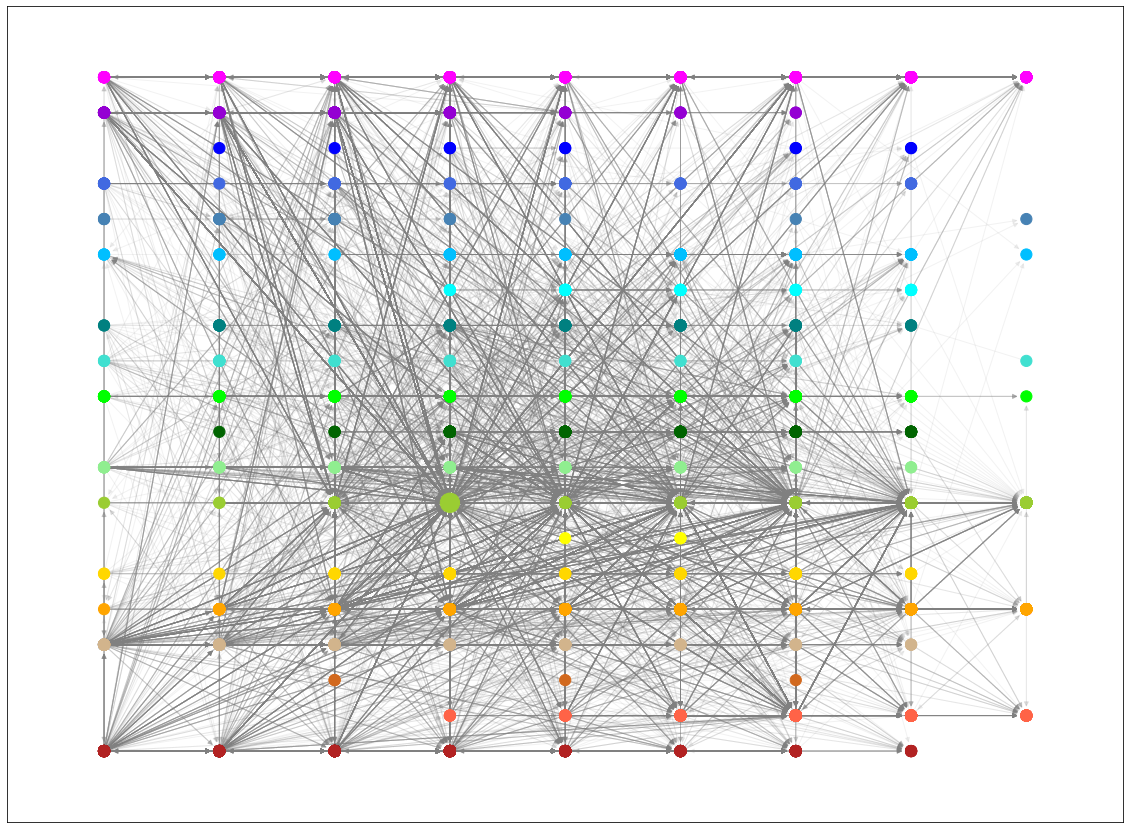

In [41]:
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network,nx.get_node_attributes(network, 'coordinates'), node_shape = '.', 
                       node_size = [importance for importance in nx.get_node_attributes(network, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network, 'color').values()])
nx.draw_networkx_edges(network,nx.get_node_attributes(network, 'coordinates'),
                       edge_color='gray',alpha = 0.1)
plt.show

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [ ]:
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network,nx.get_node_attributes(network, 'coordinates'), node_shape = '.', 
                       node_size = [importance for importance in nx.get_node_attributes(network, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network, 'color').values()])
nx.draw_networkx_edges(network,nx.get_node_attributes(network, 'coordinates'),
                       edge_color='gray',alpha = 0.1)
plt.show

In [57]:
#subnetwork1

In [107]:
#add sub_edges

{'weight': 0.7142857142857143}

In [30]:
subnet = nx.MultiGraph()
for node in nodes:
    subnet.add_node(node[1], id=node[0], genre=node[2], time=node[3],
                        genre_label=node[4], time_label=node[5])
    
sub_edges= df[['influencer_name','follower_name','follower_main_genre']].values.tolist()
for edge in sub_edges:
    subnet.add_edge(edge[0],edge[1], genre=edge[2])

In [32]:
subnet.edges['The Exploited','Special Duties',0]

{'genre': 'Pop/Rock'}

In [43]:
#set colors for artists from different genre
color_list = ['firebrick','tomato','chocolate','tan','orange','gold','yellow','yellowgreen','lightgreen', 'darkgreen',
              'lime','turquoise','teal','cyan','deepskyblue','steelblue','royalblue','blue','darkviolet','magenta']

for i in subnet.nodes():
    for j in range(len(color_list)):
        if subnet.nodes[i]['genre'].find(genre_list[j]) == 0 :
            subnet.nodes[i]['color'] = color_list[j]

In [51]:
for route in subnet.edges():
    if (subnet[route[0]][route[1]][0]['genre'] == 'Pop/Rock'):
        subnet[route[0]][route[1]][0]['color'] = 'teal'
        subnet[route[0]][route[1]][0]['size'] = 1.5
 
    else:
        subnet[route[0]][route[1]][0]['color'] = 'grey'
        subnet[route[0]][route[1]][0]['size'] = 0.2

In [52]:
for node in subnet.nodes():
    subnet.nodes[node]['coordinates'] = (network.nodes[node]['time_label'],network.nodes[node]['genre_label'])

<function matplotlib.pyplot.show(*args, **kw)>

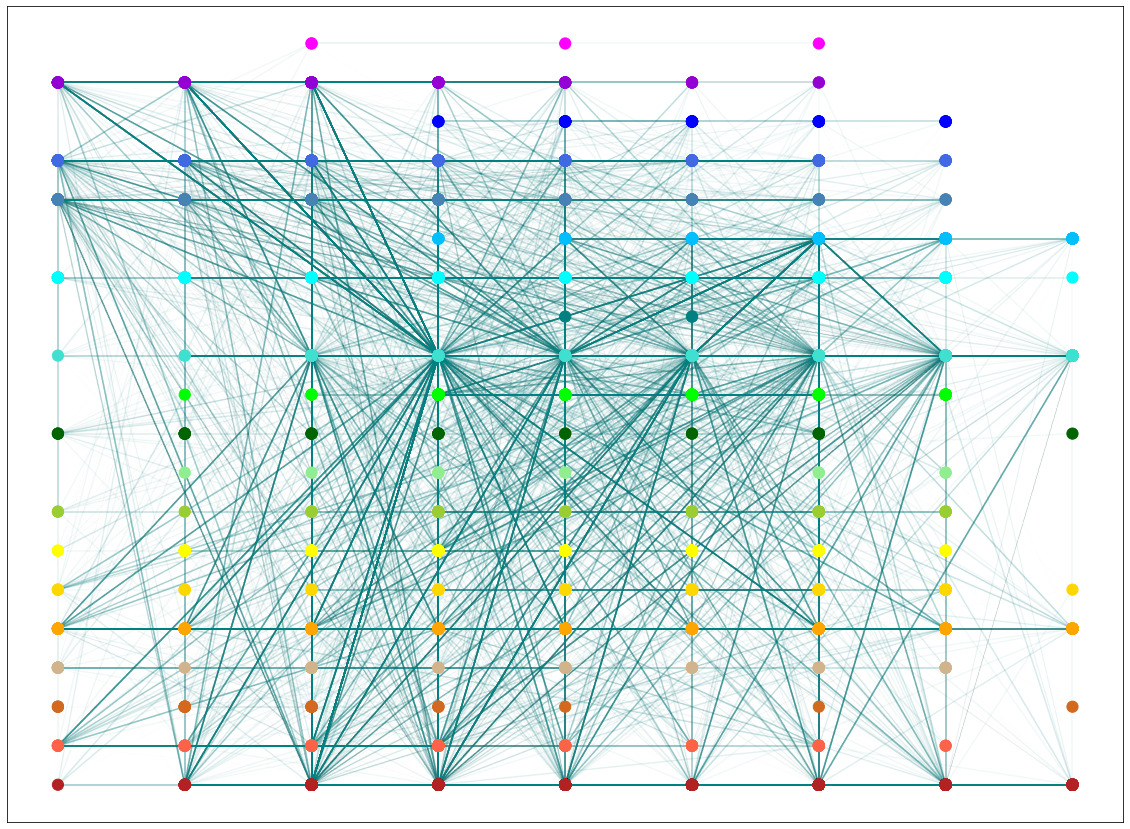

In [56]:
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(subnet,nx.get_node_attributes(subnet, 'coordinates'), node_shape = '.',node_size = 500,
                       node_color = [color for color in nx.get_node_attributes(subnet, 'color').values()])
nx.draw_networkx_edges(subnet, nx.get_node_attributes(subnet, 'coordinates'), 
                       width =[size for size in nx.get_edge_attributes(subnet, 'size').values()],
                       edge_color =[color for color in nx.get_edge_attributes(subnet, 'color').values()],
                       alpha = 0.05)
plt.show

In [83]:
# subnetwork2
H = nx.Graph(network)

In [119]:
#great influencer
great = df.groupby(by = 'influencer_name')['follower_name'].count().sort_values(ascending=False)
sub_nodes = great.index.to_list()
sub_nodes = sub_nodes[:2800]
sub_nodes

list

In [81]:
#great influencer
pop = df[df['influencer_main_genre']=='Pop/Rock']
great = pop.groupby(by = 'influencer_name')['follower_name'].count().sort_values(ascending=False)
sub_nodes = great.index.to_list()
sub_nodes = sub_nodes[:20]
sub_nodes = pd.DataFrame(sub_nodes).to_csv('great.csv')


In [58]:
df

influencer_id  influencer_name influencer_main_genre  \
0             759491    The Exploited              Pop/Rock   
1              25462           Tricky            Electronic   
2              66915        Bob Dylan              Pop/Rock   
3              71209    Leonard Cohen              Pop/Rock   
4              91438     The Gun Club              Pop/Rock   
...              ...              ...                   ...   
42765         580300   Sufjan Stevens              Pop/Rock   
42766         261309      Vybz Kartel                Reggae   
42767         467203  Michael Jackson                  R&B;   
42768        2518003          Popcaan                Reggae   
42769        2896351        Tommy Lee                Reggae   

       influencer_active_start  follower_id      follower_name  \
0                         1980           74     Special Duties   
1                         1990          335          PJ Harvey   
2                         1960          335          PJ Harvey   
3                         1950          335          PJ Harvey   
4                         1980          335          PJ Harvey   
...                        ...          ...                ...   
42765                     1990      3661738  Rosemary & Garlic   
42766                     2000      3670556   Trinidad Cardona   
42767                     1960      3670556   Trinidad Cardona   
42768                     2000      3670556   Trinidad Cardona   
42769                     2000      3670556   Trinidad Cardona   

      follower_main_genre  follower_active_start   gap_inf   genre_inf  \
0                Pop/Rock                   1980  0.428571           1   
1                Pop/Rock                   1990  0.428571   0.0134253   
2                Pop/Rock                   1990  0.642857           1   
3                Pop/Rock                   1990  0.714286           1   
4                Pop/Rock                   1990  0.500000           1   
...                   ...                    ...       ...         ...   
42765            Pop/Rock                   2010  0.571429           1   
42766                R&B;                   2010  0.500000  0.00265957   
42767                R&B;                   2010  0.785714           1   
42768                R&B;                   2010  0.500000  0.00265957   
42769                R&B;                   2010  0.500000  0.00265957   

         weight  
0      0.714286  
1      0.220998  
2      0.821429  
3      0.857143  
4          0.75  
...         ...  
42765  0.785714  
42766   0.25133  
42767  0.892857  
42768   0.25133  
42769   0.25133  

[42770 rows x 11 columns]

In [120]:
from itertools import combinations

H = nx.to_undirected(H)

nodelist = sub_nodes
paths = {}
for nodes in combinations(nodelist, r=2):
    paths[nodes] = nx.shortest_path_length(H, *nodes)

print(paths)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [121]:
max_path = max(paths.items(), key=lambda x: x[1])[0]
longest_induced_path = nx.shortest_path(H, *max_path)

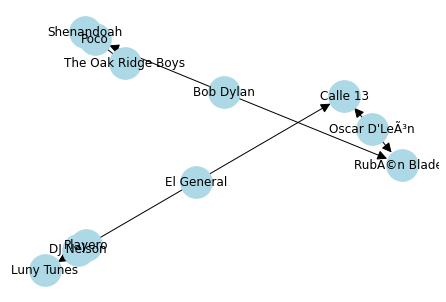

In [122]:
sG = nx.subgraph(network, longest_induced_path)

pos = nx.spring_layout(sG, scale=20, k=3/np.sqrt(network.order()))
nx.draw(sG, pos, node_color='lightblue', 
        with_labels=True, 
        node_size=1000,
        arrowsize=20)

In [14]:
for edge in network.edges():
    for node
        if (network.edges[edge[0], edge[1]]['influencer_genre'] == 'Pop/Rock'):
            network[edge[0]][edge[1]]['color'] = 'yellowgreen'
            network[edge[0]][edge[1]]['size'] = 1.5
        else:
            network[edge[0]][edge[1]]['color'] = 'grey'
            network[edge[0]][edge[1]]['size'] = 0.2

NameError: name 'network' is not defined

In [82]:
df

influencer_id  influencer_name influencer_main_genre  \
0             759491    The Exploited              Pop/Rock   
1              25462           Tricky            Electronic   
2              66915        Bob Dylan              Pop/Rock   
3              71209    Leonard Cohen              Pop/Rock   
4              91438     The Gun Club              Pop/Rock   
...              ...              ...                   ...   
42765         580300   Sufjan Stevens              Pop/Rock   
42766         261309      Vybz Kartel                Reggae   
42767         467203  Michael Jackson                  R&B;   
42768        2518003          Popcaan                Reggae   
42769        2896351        Tommy Lee                Reggae   

       influencer_active_start  follower_id      follower_name  \
0                         1980           74     Special Duties   
1                         1990          335          PJ Harvey   
2                         1960          335          PJ Harvey   
3                         1950          335          PJ Harvey   
4                         1980          335          PJ Harvey   
...                        ...          ...                ...   
42765                     1990      3661738  Rosemary & Garlic   
42766                     2000      3670556   Trinidad Cardona   
42767                     1960      3670556   Trinidad Cardona   
42768                     2000      3670556   Trinidad Cardona   
42769                     2000      3670556   Trinidad Cardona   

      follower_main_genre  follower_active_start   gap_inf   genre_inf  \
0                Pop/Rock                   1980  0.428571           1   
1                Pop/Rock                   1990  0.428571   0.0134253   
2                Pop/Rock                   1990  0.642857           1   
3                Pop/Rock                   1990  0.714286           1   
4                Pop/Rock                   1990  0.500000           1   
...                   ...                    ...       ...         ...   
42765            Pop/Rock                   2010  0.571429           1   
42766                R&B;                   2010  0.500000  0.00265957   
42767                R&B;                   2010  0.785714           1   
42768                R&B;                   2010  0.500000  0.00265957   
42769                R&B;                   2010  0.500000  0.00265957   

         weight  
0      0.714286  
1      0.220998  
2      0.821429  
3      0.857143  
4          0.75  
...         ...  
42765  0.785714  
42766   0.25133  
42767  0.892857  
42768   0.25133  
42769   0.25133  

[42770 rows x 11 columns]

In [93]:
z = ['Elvis Presley','Bob Dylan','Sex Pistols','Metallica','Radiohead','Avril Lavigne']
z = pd.DataFrame(np.array(z))
z.to_csv('z.csv')

In [ ]:
nx.draw_random(network,with_labels=False,node_shape = '.',node_size = [importance for importance in nx.get_node_attributes(network, 'importance').values()],\
                     node_color = [color for color in nx.get_node_attributes(network, 'color').values()],\
                     width =[size for size in nx.get_edge_attributes(network, 'size').values()],\
                     edge_color =[color for color in nx.get_edge_attributes(network, 'color').values()],\
                     alpha = 0.1)    

In [ ]:
nx.draw_networkx_nodes(network,nx.get_node_attributes(network, 'coordinates'), node_shape = '.', 
                       node_size = [importance for importance in nx.get_node_attributes(network, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network, 'color').values()])
nx.draw_networkx_edges(network,nx.get_node_attributes(network, 'coordinates'),
                       width =[size for size in nx.get_edge_attributes(network, 'size').values()],
                       edge_color =[color for color in nx.get_edge_attributes(network, 'color').values()],
                       alpha = 0.1)

    nx.get_node_attributes(network, 'coordinates'),
     nx.get_node_attributes(network, 'coordinates'), 